In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
covid_df = pd.read_csv('/content/covid19_Confirmed_dataset.csv')
happiness_df = pd.read_csv('/content/worldwide_happiness_report.csv') # loading the dataset
print("Datasets loaded successfully!")
# Display the first few rows to confirm loading
print("\n--- COVID-19 Confirmed Cases Data ---")
covid_df.head()

Datasets loaded successfully!

--- COVID-19 Confirmed Cases Data ---


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [2]:
covid_df.drop(['Province/State','Lat','Long'],axis=1,inplace=True)#dropping unwanted data
covid_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
#change the index
covid_data=covid_df.groupby("Country/Region").sum()

In [5]:
covid_data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
covid_data.shape

(187, 100)

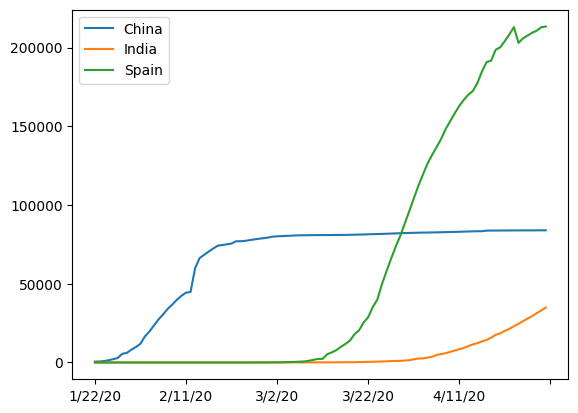

In [7]:
covid_data.loc()["China"].plot()
covid_data.loc()["India"].plot()
covid_data.loc()["Spain"].plot()
plt.legend()

<Axes: >

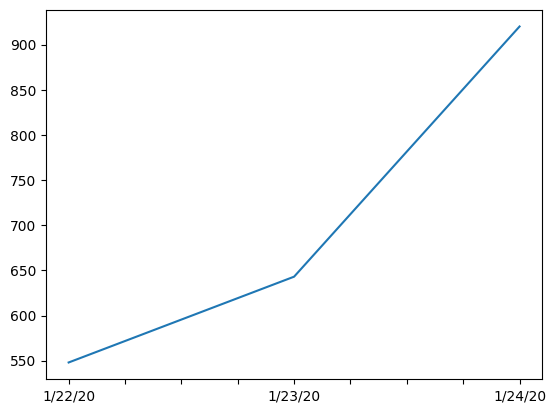

In [8]:
covid_data.loc()["China"][0:3].plot()

<Axes: >

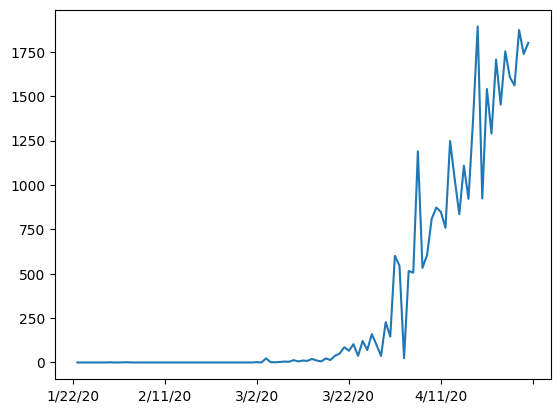

In [9]:
covid_data.loc()["India"].diff().plot()

In [11]:
covid_data.loc()["India"].diff().max()

1893.0

<Axes: >

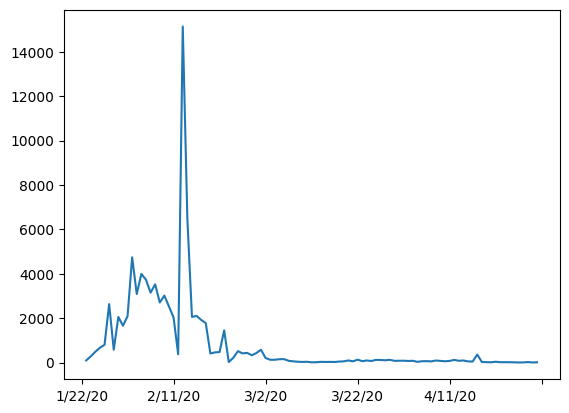

In [10]:
covid_data.loc()["China"].diff().max()
covid_data.loc()["China"].diff().plot()

In [12]:
countries=list(covid_data.index)
max_inf=[]
for c in countries:
  max_inf.append(covid_data.loc[c].diff().max())
covid_data["max_infection_rates"]=max_inf

In [13]:
covid_data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [14]:
corona_data=pd.DataFrame(covid_data["max_infection_rates"])
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [15]:
happiness_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [16]:
useless=["Overall rank","Generosity","Perceptions of corruption","Score"]
happiness_df.drop(useless,axis=1,inplace=True)

In [17]:
happiness_df.set_index("Country or region", inplace= True)

In [18]:
final_data=corona_data.join(happiness_df,how="inner")
final_data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [19]:
correlation=final_data.corr()
correlation

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<Axes: >

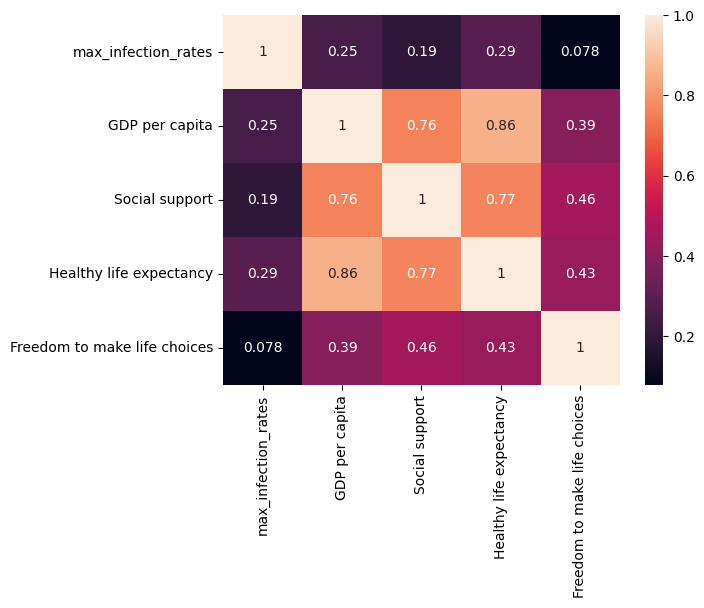

In [20]:
sns.heatmap(correlation,annot=True)

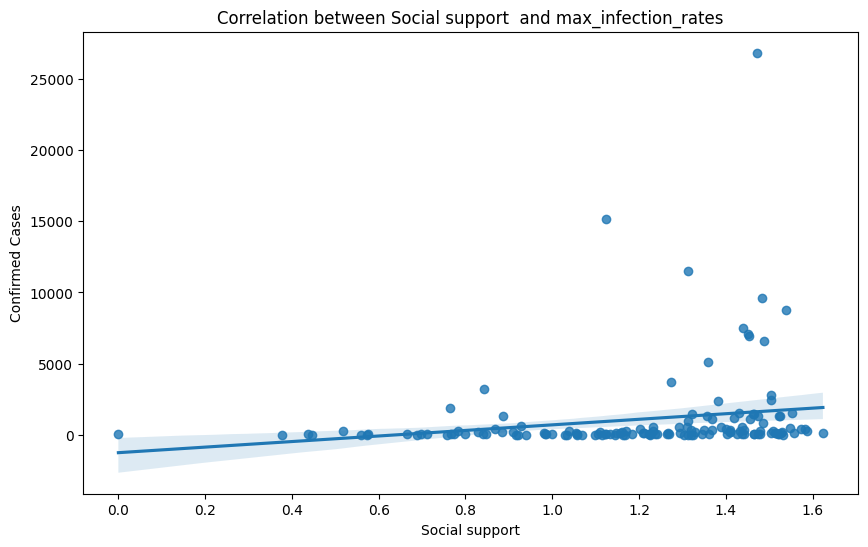

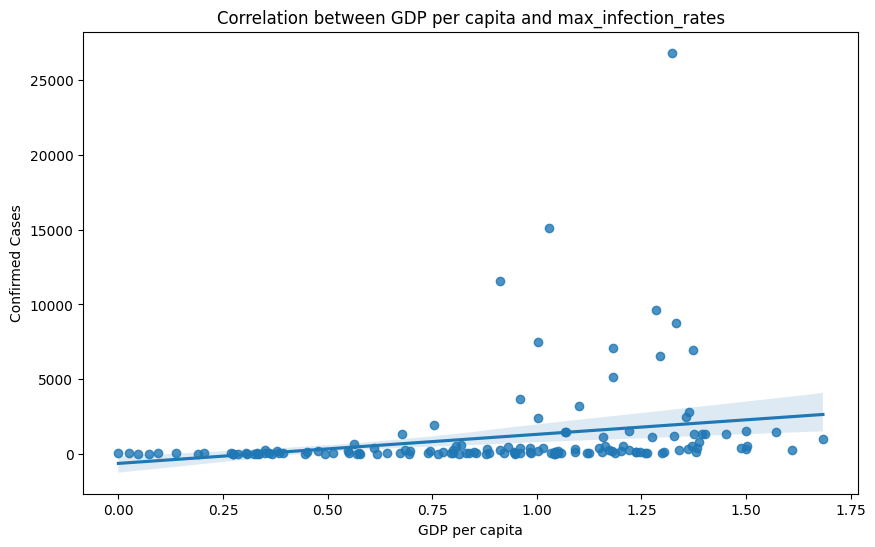

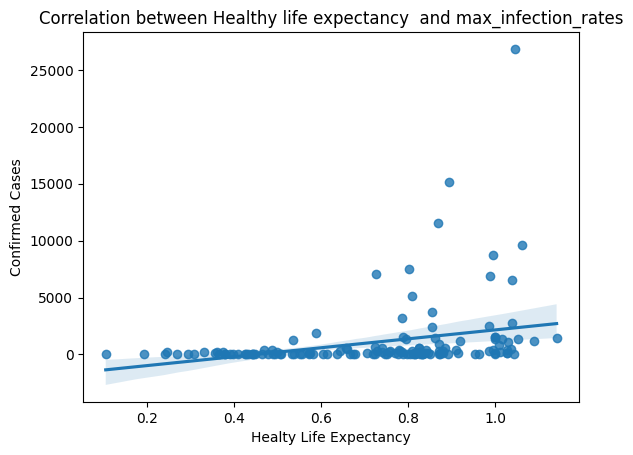

In [21]:
# Scatter plot to visualize the correlation between Happiness Score and Confirmed Cases
plt.figure(figsize=(10, 6))
sns.regplot(x='Social support', y='max_infection_rates', data=final_data)
plt.title('Correlation between Social support  and max_infection_rates')
plt.xlabel('Social support')
plt.ylabel('Confirmed Cases')
plt.show()
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP per capita', y='max_infection_rates', data=final_data)
plt.title('Correlation between GDP per capita and max_infection_rates')
plt.xlabel('GDP per capita')
plt.ylabel('Confirmed Cases')
plt.show()
sns.regplot(x='Healthy life expectancy', y='max_infection_rates', data=final_data)
plt.title('Correlation between Healthy life expectancy  and max_infection_rates')
plt.xlabel('Healty Life Expectancy')
plt.ylabel('Confirmed Cases')
plt.show()

In [22]:
# Summarize your findings based on the analysis
print("\n--- Project Insights and Conclusions ---")

# Analyze the correlation between Happiness Score and Confirmed Cases
correlation_score = correlation.loc['Social support', 'max_infection_rates']
print(f"The correlation between Social support and Confirmed Cases is: {correlation_score:.2f}")
correlation_score1 = correlation.loc['GDP per capita', 'max_infection_rates']
print(f"The correlation between GDP per capita and Confirmed Cases is: {correlation_score1:.2f}")
correlation_score2 = correlation.loc['Healthy life expectancy', 'max_infection_rates']
print(f"The correlation between Life expectancy and Confirmed Cases is: {correlation_score2:.2f}")

# You can add more detailed insights here based on your observations
print("\nKey Observations:")
print("   - From the scatter plots, there appears to be a weak or no direct linear relationship between a country's happiness score, Gdp , life expectancy and its total confirmed COVID-19 cases.")
print("   - we can further analyze that they are +ve ly co related to each other but the relationship is very weak[comparatively in the order of life expectancy>GDP>Social support].")
print("   - This project demonstrates that the relationship between these global indicators is complex and likely influenced by many other factors not included in these datasets, such as government policies, testing rates, and population density.")


--- Project Insights and Conclusions ---
The correlation between Social support and Confirmed Cases is: 0.19
The correlation between GDP per capita and Confirmed Cases is: 0.25
The correlation between Life expectancy and Confirmed Cases is: 0.29

Key Observations:
   - From the scatter plots, there appears to be a weak or no direct linear relationship between a country's happiness score, Gdp , life expectancy and its total confirmed COVID-19 cases.
   - we can further analyze that they are +ve ly co related to each other but the relationship is very weak[comparatively in the order of life expectancy>GDP>Social support].
   - This project demonstrates that the relationship between these global indicators is complex and likely influenced by many other factors not included in these datasets, such as government policies, testing rates, and population density.
